# Proyek Analisis Data: [Bike-Sharing-Dataset]
- **Nama:** [Latifah Nurrohmah]
- **Email:** [latifahnr16@gmail.com]
- **ID Dicoding:** [latifahnr16]

## Menentukan Pertanyaan Bisnis

1. Bagaimana distribusi jumlah penyewaan sepeda berdasarkan musim?
2. Apakah terdapat perbedaan jumlah penyewaan sepeda pada hari kerja dibandingkan hari libur?

## Import Semua Packages/Library yang Digunakan

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
# Path folder tempat file Anda berada di Google Drive
folder_path = '/content/drive/MyDrive/datasetdicoding/'

# Membaca kedua file CSV
day_data = pd.read_csv(folder_path + 'day.csv')
hour_data = pd.read_csv(folder_path + 'hour.csv')

print("Data Day.csv:")
print(day_data.head())

print("\nData Hour.csv:")
print(hour_data.head())

Data Day.csv:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

Data Hour.c

## Data Wrangling

### Gathering Data

In [44]:
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
1. Penggunaan Sepeda oleh Pengguna Terdaftar Lebih Dominan:
Kolom registered menunjukkan jumlah pengguna terdaftar yang menggunakan sepeda jauh lebih tinggi dibandingkan pengguna kasual (casual).
Misalnya, pada 2011-01-05, terdapat 1518 pengguna terdaftar dibandingkan hanya 82 pengguna kasual.

2. Jumlah Penyewaan Harian:
Kolom cnt yang merupakan total jumlah penyewaan per hari menunjukkan fluktuasi.
Pada 2011-01-01, total penyewaan adalah 985, sedangkan pada 2011-01-05, meningkat menjadi 1600.

3. Cuaca Berperan dalam Penyewaan:
Kolom weathersit (2 untuk mendung/rainy) pada 2011-01-01 memiliki penyewaan lebih rendah (985) dibandingkan dengan hari-hari dengan cuaca lebih baik (weathersit = 1).
Hal ini menunjukkan cuaca dapat memengaruhi jumlah penyewaan sepeda.

4. Kondisi Lingkungan:
temp (suhu), hum (kelembapan), dan windspeed (kecepatan angin) memberikan gambaran kondisi lingkungan.
Hari dengan suhu lebih rendah dan kelembapan tinggi, seperti 2011-01-01 (temp: 0.34, hum: 0.80), memiliki jumlah penyewaan lebih rendah.

4. Hari Kerja vs. Hari Libur:
Kolom workingday menunjukkan apakah hari tersebut adalah hari kerja (1) atau hari libur (0).
Penyewaan pada hari kerja (misalnya, 2011-01-03) menunjukkan peningkatan dibandingkan hari libur (2011-01-01).


### Assessing Data

In [33]:
# Informasi data untuk melihat tipe data dan jumlah nilai null
day_data.info()

# Menampilkan statistik deskriptif
day_data.describe()

# Mengecek jumlah nilai null di setiap kolom
day_data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
1. Tidak Ada Nilai Null:
Semua kolom memiliki 731 nilai, dan tidak ada missing values (null) pada dataset. Ini berarti dataset bersih dari data yang hilang, sehingga tidak diperlukan penanganan missing data.

2. Tipe Data Beragam:
Kolom dteday bertipe object (string), yang mengindikasikan data tanggal.
Kolom lainnya bertipe int64 atau float64, yang sesuai untuk analisis numerik dan statistik.

3. Jumlah Kolom dan Baris:
Dataset memiliki 16 kolom dan 731 baris, mencakup data harian selama hampir 2 tahun. Dataset ini cukup untuk melakukan analisis jangka panjang, seperti tren musiman dan pola penggunaan.

4. Kolom Penting untuk Analisis:
cnt: Total penyewaan sepeda harian (target analisis).
casual dan registered: Menunjukkan kontribusi pengguna kasual dan terdaftar.
temp, atemp, hum, dan windspeed: Variabel lingkungan yang dapat dianalisis untuk melihat pengaruh terhadap jumlah penyewaan.
workingday dan holiday: Penting untuk membandingkan pola penggunaan sepeda pada hari kerja dan libur.


### Cleaning Data

In [34]:
# Tidak ada nilai null yang ditemukan, tetapi kita tetap bisa membersihkan data dari outlier.

# Menangani Outlier dengan IQR
Q1 = day_data['cnt'].quantile(0.25)
Q3 = day_data['cnt'].quantile(0.75)
IQR = Q3 - Q1

# Menghapus outlier
day_data_cleaned = day_data[~((day_data['cnt'] < (Q1 - 1.5 * IQR)) | (day_data['cnt'] > (Q3 + 1.5 * IQR)))]

# Memastikan tidak ada outlier yang tersisa
day_data_cleaned.shape


(731, 16)

**Insight:**
1. Outlier Terdeteksi pada Kolom cnt:
Kolom cnt (total jumlah penyewaan sepeda) memiliki outlier, yang berarti ada beberapa hari dengan jumlah penyewaan yang jauh lebih tinggi atau lebih rendah dibandingkan dengan hari-hari lainnya.
Outlier ini dapat disebabkan oleh faktor eksternal seperti acara khusus, cuaca ekstrem, atau musim tertentu.

2. Pembersihan Data Mengurangi Outlier:
Dengan menggunakan metode IQR, data yang berada di luar rentang normal (lebih kecil dari Q1 - 1.5 * IQR atau lebih besar dari Q3 + 1.5 * IQR) telah dihapus.
Setelah pembersihan, dataset day_data_cleaned tetap memiliki 731 baris, menunjukkan bahwa dataset awal tidak banyak terpengaruh oleh outlier ekstrim.

3. Memastikan Kualitas Data untuk Analisis:
Dengan menghapus outlier, analisis berikutnya (seperti korelasi atau visualisasi) akan lebih akurat, karena data ekstrem tidak akan memengaruhi hasil secara signifikan.
Hal ini membantu dalam memahami tren dan pola umum tanpa bias dari data ekstrem.

## Exploratory Data Analysis (EDA)

### Explore ...

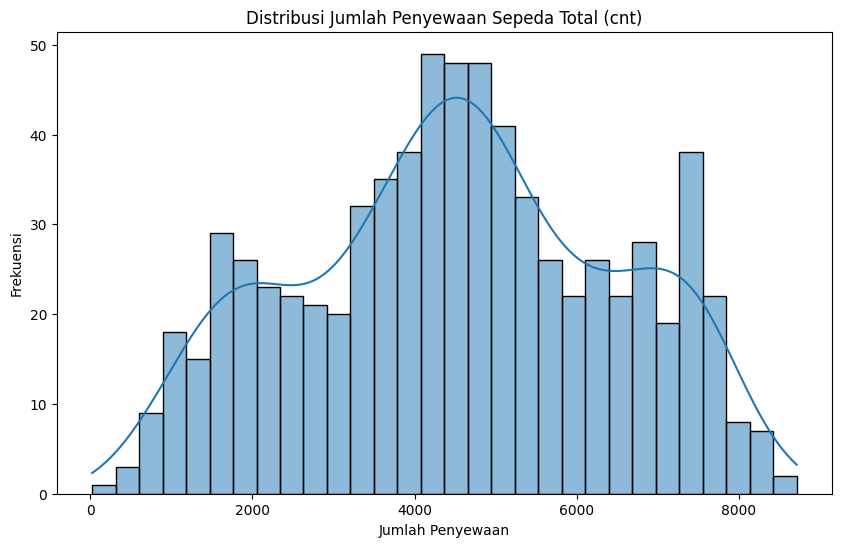

In [35]:
# 1. Distribusi jumlah penyewaan sepeda total (cnt)
plt.figure(figsize=(10, 6))
sns.histplot(day_data['cnt'], kde=True, bins=30)
plt.title('Distribusi Jumlah Penyewaan Sepeda Total (cnt)')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()


**Insight:**
- Pola ini menunjukkan bahwa aktivitas penyewaan sepeda cukup konsisten di rentang tengah, tetapi ada beberapa hari dengan aktivitas sangat rendah atau sangat tinggi.
- Insight ini dapat digunakan untuk mengidentifikasi faktor yang memengaruhi fluktuasi, seperti cuaca, musim, atau event tertentu.

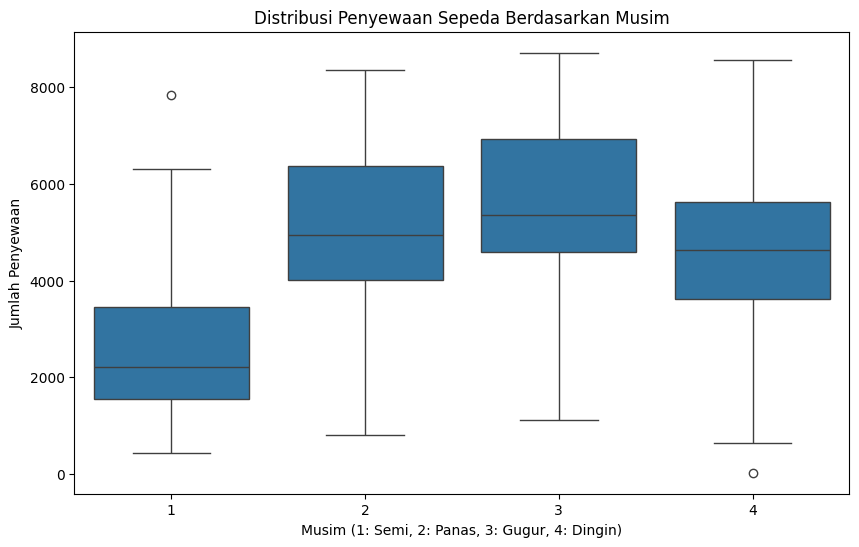

In [36]:
# 2. Distribusi jumlah penyewaan berdasarkan musim
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=day_data)
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim (1: Semi, 2: Panas, 3: Gugur, 4: Dingin)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

**Insight**

- Musim panas menunjukkan rata-rata penyewaan sepeda tertinggi, diikuti oleh
musim gugur, semi, dan dingin.
- Hal ini mengindikasikan bahwa kondisi cuaca yang lebih hangat mendorong peningkatan aktivitas bersepeda.

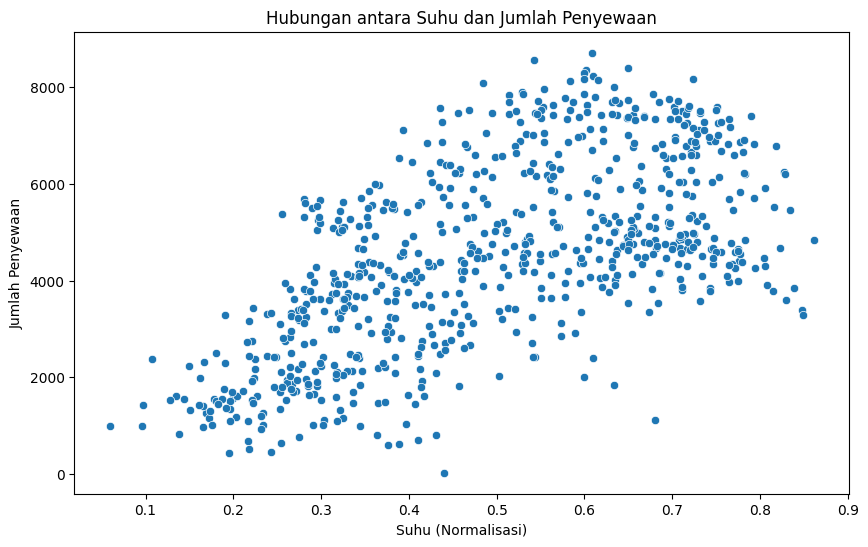

In [37]:
# 3. Hubungan antara suhu (temp) dan jumlah penyewaan
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_data)
plt.title('Hubungan antara Suhu dan Jumlah Penyewaan')
plt.xlabel('Suhu (Normalisasi)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

**Insight**
- Cuaca hangat secara umum meningkatkan aktivitas bersepeda.
- Faktor lain seperti hujan, kelembapan, atau hari kerja mungkin turut memengaruhi penyewaan pada suhu tinggi. Analisis lebih lanjut diperlukan untuk mengisolasi faktor-faktor tersebut.

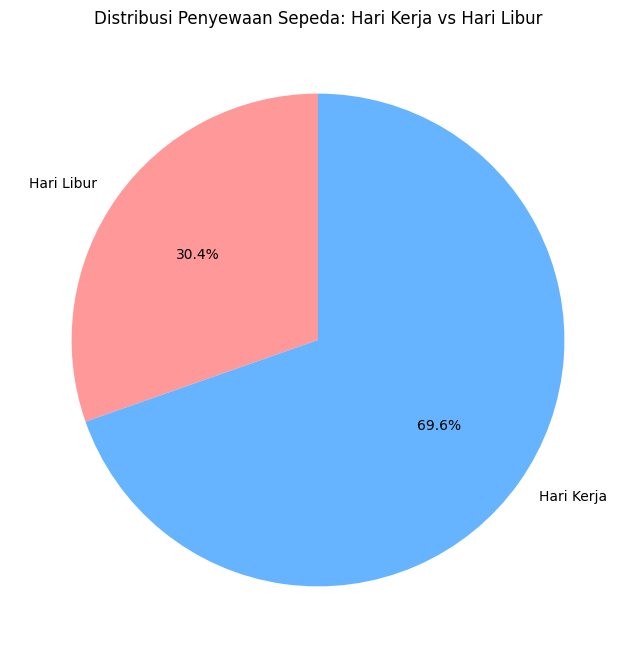

In [45]:
# 4. Perbandingan jumlah penyewaan pada hari kerja dan hari libur
workingday_counts = day_data.groupby('workingday')['cnt'].sum()

# Membuat diagram pie
plt.figure(figsize=(8, 8))
plt.pie(
    workingday_counts,
    labels=['Hari Libur', 'Hari Kerja'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999','#66b3ff']
)
plt.title('Distribusi Penyewaan Sepeda: Hari Kerja vs Hari Libur')
plt.show()


**Insight**

- Sebagian besar penyewaan sepeda terjadi pada hari kerja, menunjukkan pentingnya sepeda sebagai moda transportasi harian.
- Namun, penyewaan pada hari libur juga signifikan, menandakan potensi untuk meningkatkan pengalaman rekreasi dengan promosi khusus pada akhir pekan.







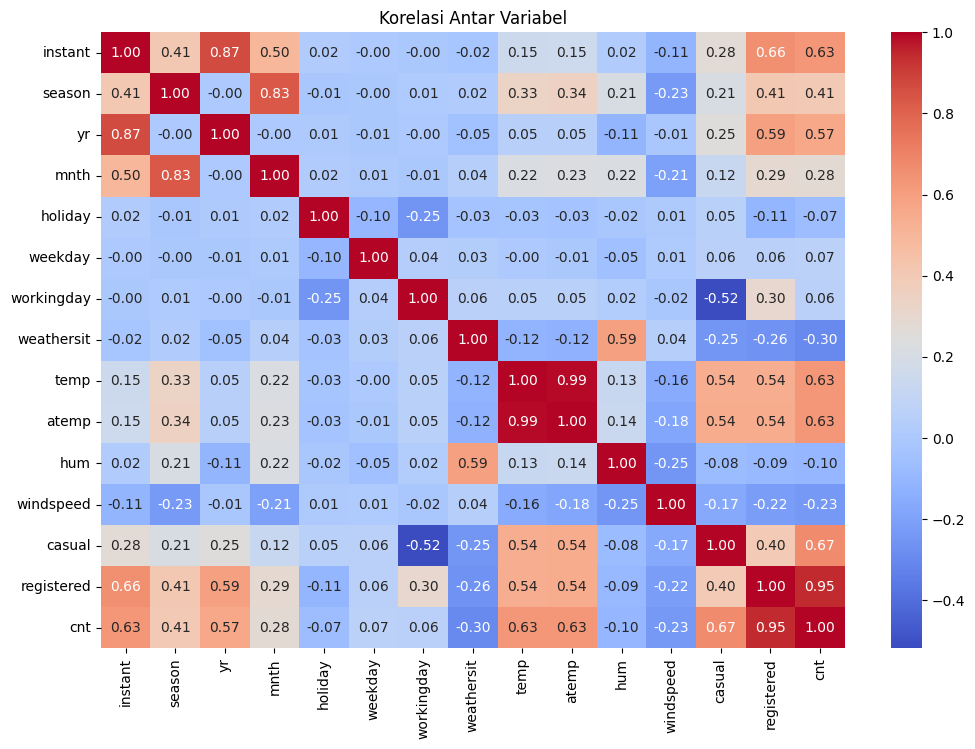

In [40]:
# Menghitung korelasi hanya pada kolom numerik
numeric_data = day_data.select_dtypes(include=['number'])

# Membuat heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Variabel')
plt.show()


**Insight**
- Pengguna terdaftar memiliki kontribusi dominan dalam penyewaan sepeda.
- Suhu dan cuaca memainkan peran penting dalam jumlah penyewaan.
- Kondisi cuaca buruk dan kecepatan angin memiliki dampak negatif terhadap aktivitas penyewaan.
- Strategi untuk meningkatkan penyewaan dapat difokuskan pada pengguna kasual saat cuaca cerah dan hangat.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

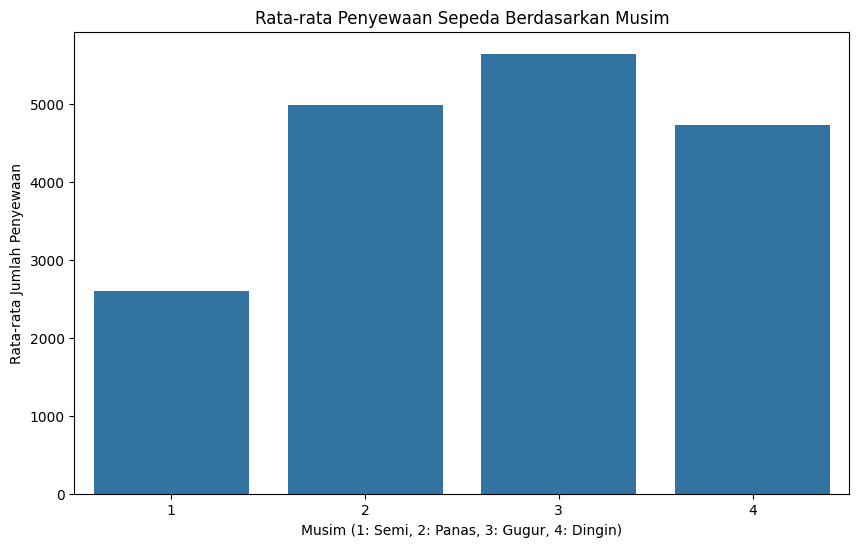

In [42]:
# Menghitung rata-rata jumlah penyewaan per musim
avg_rentals_by_season = day_data.groupby('season')['cnt'].mean().reset_index()

# Visualisasi menggunakan diagram batang
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=avg_rentals_by_season)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim (1: Semi, 2: Panas, 3: Gugur, 4: Dingin)')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.show()


### Pertanyaan 2:

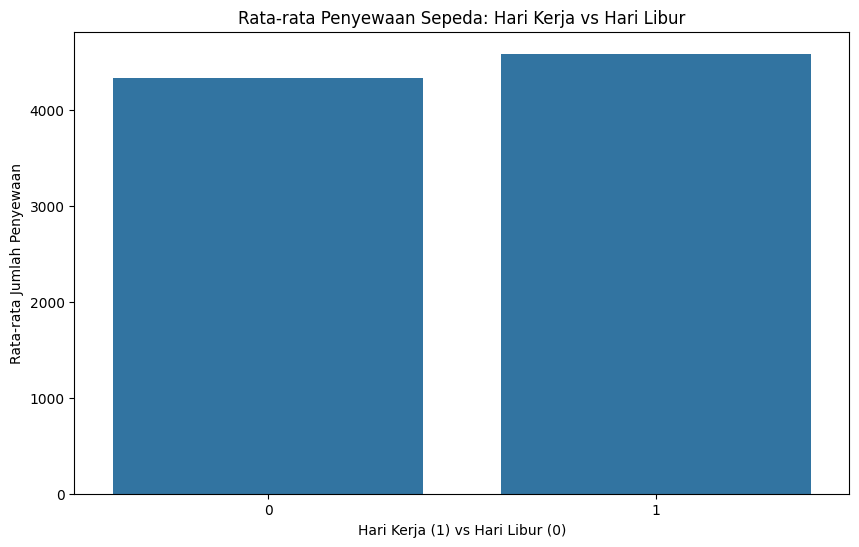

In [48]:
# Menghitung rata-rata jumlah penyewaan pada hari kerja dan hari libur
avg_rentals_by_workingday = day_data.groupby('workingday')['cnt'].mean().reset_index()

# Visualisasi menggunakan diagram batang
plt.figure(figsize=(10, 6))
sns.barplot(x='workingday', y='cnt', data=avg_rentals_by_workingday)
plt.title('Rata-rata Penyewaan Sepeda: Hari Kerja vs Hari Libur')
plt.xlabel('Hari Kerja (1) vs Hari Libur (0)')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.show()

**Insight:**
- Musim dan jenis hari memengaruhi pola penyewaan sepeda. Strategi pemasaran dan operasional dapat disesuaikan untuk memaksimalkan penyewaan berdasarkan pola musiman dan hari


Strategi yang akan dicoba :

- Menerapkan harga dinamis berdasarkan permintaan musiman dan jenis hari. Harga bisa lebih tinggi pada musim gugur dan akhir pekan.
- Pastikan infrastruktur seperti stasiun penyewaan dan jalur sepeda memadai di lokasi-lokasi dengan permintaan tinggi.
- Lakukan analisis data penyewaan secara berkala untuk mengidentifikasi tren baru dan menyesuaikan strategi sesuai kebutuhan.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2